In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd


root_dir = '/standard/UVA-DSA/NIST EMS Project Data/CognitiveEMS_Datasets/North_Garden/May_2024/May24_updated_structure'
plot_dir = './plots'

subject = 'ng1'
trial = '1'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [4]:
#load flow

i3d_dir = f'{root_dir}/i3d_rgb_flow/{subject}/{trial}'

flow_dir = f'{i3d_dir}/GX010305_clipped_flow.npy'
rgb_dir = f'{i3d_dir}/GX010305_clipped_rgb.npy'

flow_uv = np.load(flow_dir)
rgb = np.load(rgb_dir)
print(flow_uv.shape) # (n_frames, feature_dim)
print(rgb.shape)# (n_frames, feature_dim)

(4602, 1024)
(4602, 1024)


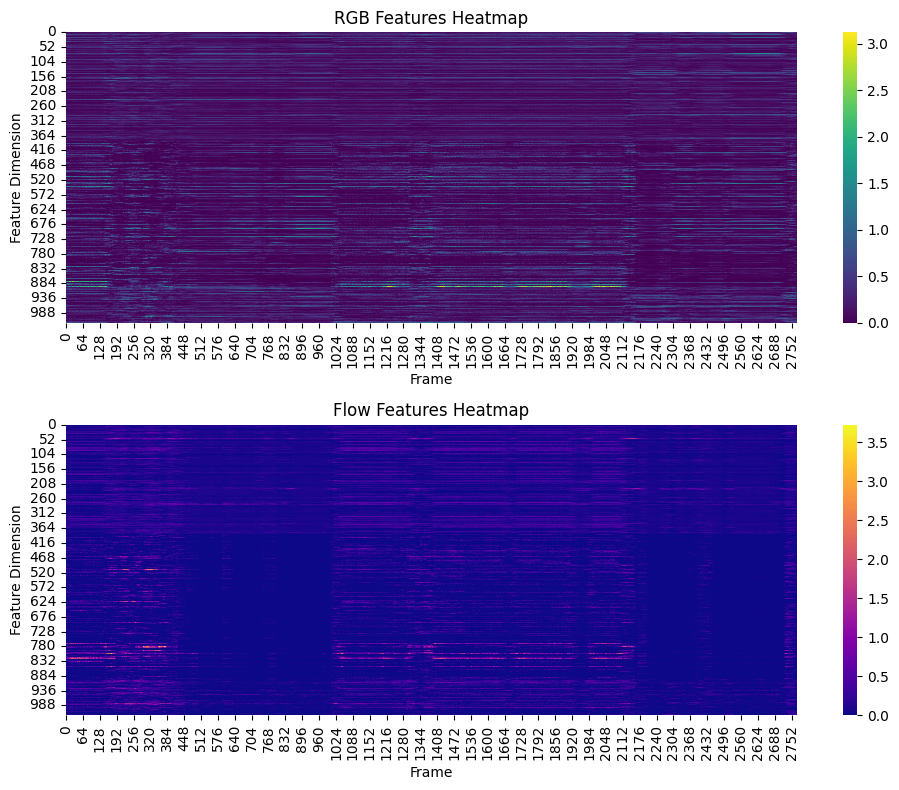

In [24]:
import seaborn as sns

plt.figure(figsize=(10, 8))

# consider only the first 100 frames

# RGB Heatmap
plt.subplot(2, 1, 1)
sns.heatmap(rgb.T, cmap='viridis', cbar=True)
plt.title('RGB Features Heatmap')
plt.xlabel('Frame')
plt.ylabel('Feature Dimension')

# Flow Heatmap
plt.subplot(2, 1, 2)
sns.heatmap(flow_uv.T, cmap='plasma', cbar=True)
plt.title('Flow Features Heatmap')
plt.xlabel('Frame')
plt.ylabel('Feature Dimension')

plt.tight_layout()
plt.show()


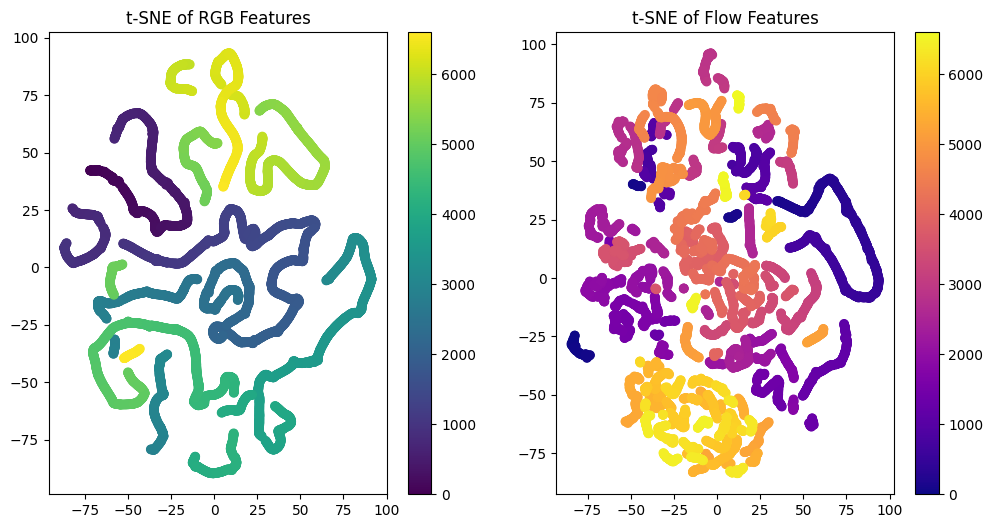

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming rgb and flow_uv are your loaded features
tsne = TSNE(n_components=2, random_state=42)
rgb_tsne = tsne.fit_transform(rgb)
flow_tsne = tsne.fit_transform(flow_uv)

plt.figure(figsize=(12, 6))

# RGB t-SNE
plt.subplot(1, 2, 1)
plt.scatter(rgb_tsne[:, 0], rgb_tsne[:, 1], c=range(len(rgb)), cmap='viridis')
plt.colorbar()
plt.title('t-SNE of RGB Features')

# Flow t-SNE
plt.subplot(1, 2, 2)
plt.scatter(flow_tsne[:, 0], flow_tsne[:, 1], c=range(len(flow_uv)), cmap='plasma')
plt.colorbar()
plt.title('t-SNE of Flow Features')

plt.show()


# Frame wise visualization

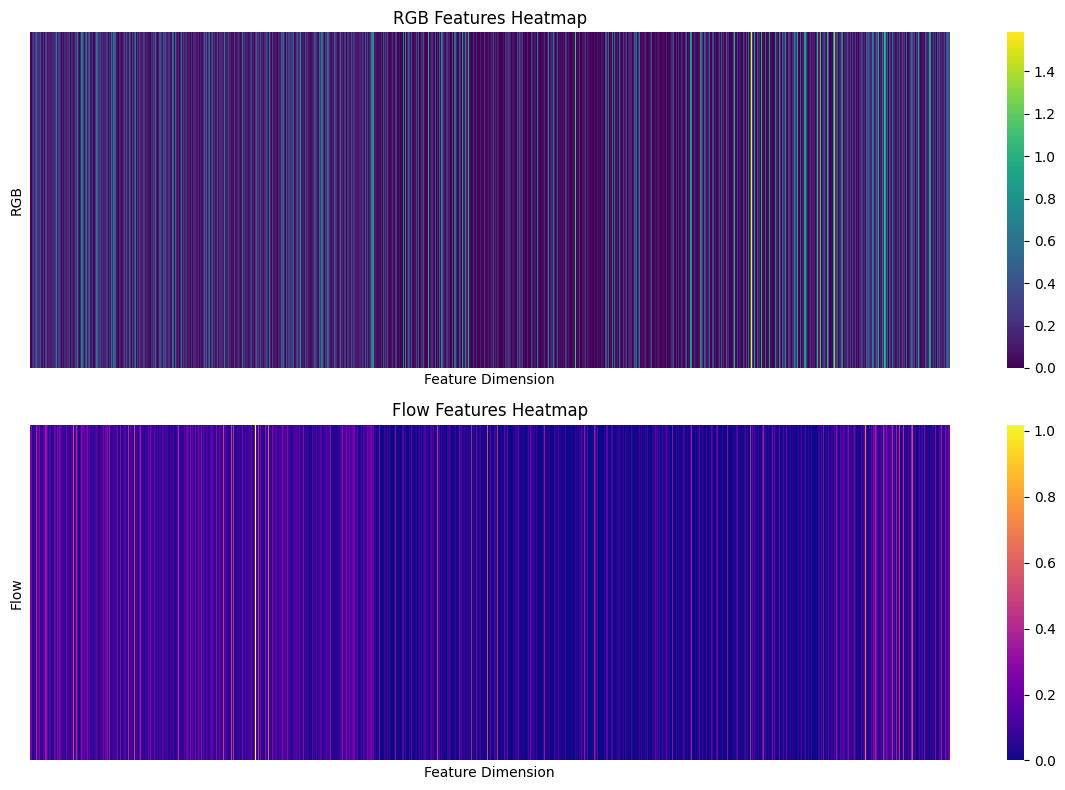

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rgb_features and flow_features are the features of a single image
rgb_features = rgb[0]  # Select the first image features (shape: feature_dim)
flow_features = flow_uv[0]  # Select the first image features (shape: feature_dim)

plt.figure(figsize=(12, 8))

# RGB Features Heatmap
plt.subplot(2, 1, 1)
sns.heatmap(rgb_features.reshape(1, -1), cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
plt.title('RGB Features Heatmap')
plt.xlabel('Feature Dimension')
plt.ylabel('RGB')

# Flow Features Heatmap
plt.subplot(2, 1, 2)
sns.heatmap(flow_features.reshape(1, -1), cmap='plasma', cbar=True, xticklabels=False, yticklabels=False)
plt.title('Flow Features Heatmap')
plt.xlabel('Feature Dimension')
plt.ylabel('Flow')

plt.tight_layout()
plt.show()


# Smartwatch Visualization

In [26]:
#load smartwatch
sw_dir = f'{root_dir}/smartwatch_imu/{subject}/{trial}'

sw_csv_dir = f'{sw_dir}/sw_data.csv'

     sw_epoch_ms wrist_position sensor_type  value_X_Axis  value_Y_Axis  \
0  1716509167602          right         acc     11.379641     -6.414066   
1  1716509167617          right         acc     10.043676     -9.167398   
2  1716509167637          right         acc     10.749966     -7.443573   
3  1716509167656          right         acc     10.019734     -7.323863   
4  1716509167676          right         acc      9.320627     -6.933608   

   value_Z_Axis      server_epoch_ms  
0      7.017405  1716509450826933000  
1      8.214506  1716509450852066900  
2      7.436390  1716509450858575900  
3      7.450756  1716509450874220600  
4      6.078878  1716509450889843900  


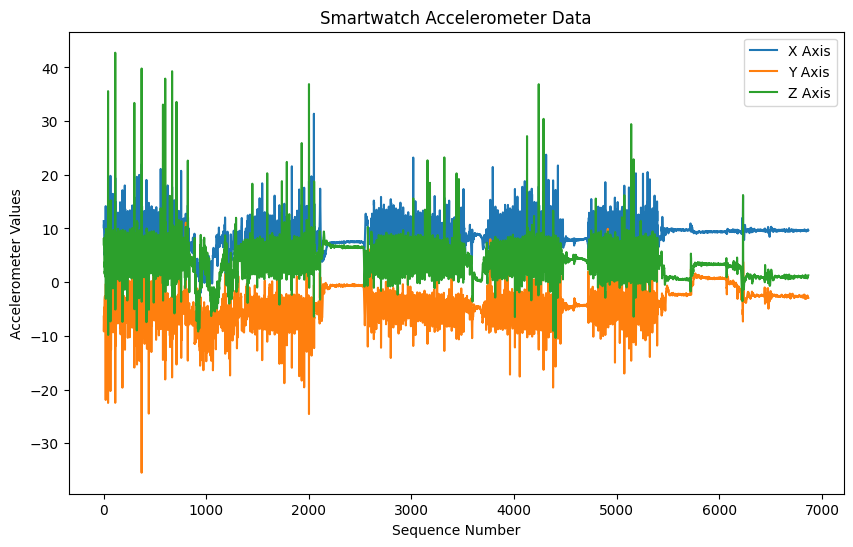

In [27]:
def plot_data(csv_file, output_folder):
    df = pd.read_csv(csv_file, index_col=False)

    print(df.head(5))

    # add column for sequence number
    df['seq_num'] = range(1, len(df) + 1)
    # Plot x, y, z axis values with seq_num on the x-axis
    plt.figure(figsize=(10, 6))
    plt.plot(df['seq_num'], df['value_X_Axis'], label='X Axis')
    plt.plot(df['seq_num'], df['value_Y_Axis'], label='Y Axis')
    plt.plot(df['seq_num'], df['value_Z_Axis'], label='Z Axis')

    # Adding labels and title
    plt.xlabel('Sequence Number')
    plt.ylabel('Accelerometer Values')
    plt.title('Smartwatch Accelerometer Data')
    plt.legend()

    plot_filename = os.path.join(output_folder, f"{os.path.basename(csv_file).replace('.csv', '.png')}")
    plt.savefig(plot_filename)

    plt.show()
    plt.close()  


plot_data(sw_csv_dir, plot_dir)
